# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

# Business Understanding

### First things first, what is a mail-order sales company? 

According to britannica, a mail-order business is a
> method of merchandising in which the seller’s offer is made through mass mailing of a circular or catalog or through an advertisement placed in a newspaper or magazine and in which the buyer places an order by mail.

### **What are we supposed do in this project?**
1. We need to compare the population of customers with the general population 
2. We need find out which targeted individuals in the new mailout campaign are more likely to convert

### **How can we compare the populations of customers with the general population?**
1. First we shall explore the data to get to know the features within it
2. Then we shall segment the general population 
3. Finally we shall figure out which segments do our customers belong to

### **How can we find out which targeted individuals in the new campaign are likely to convert?**
1. By predicting the segment of these targeted individuals
2. We can find out if they belong to our customers segments or other segments in the population

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [ ]:
# csv data path
data_path = '../../data/Term2/capstone/arvato_data/'

# csv files
azdias_csv = 'Udacity_AZDIAS_052018.csv'
customers_csv = 'Udacity_CUSTOMERS_052018.csv'

# csv file paths
azdias_csv_path = os.path.join(data_path, azdias_csv)
customers_csv_path = os.path.join(data_path, customers_csv)

# pickle files
azdias_pickle = 'Udacity_AZDIAS_052018.csv.pandas.pickle'
customers_pickle = 'Udacity_CUSTOMERS_052018.csv.pandas.pickle'

# load pickled datasets if exists
if azdias_pickle in os.listdir() and customers_pickle in os.listdir():
    print("Loading AZDIAS pickle...")
#     azdias = pickle.load(open(azdias_pickle, 'rb'))
    azdias = pd.read_pickle(azdias_pickle)
    
    print("Loading CUSTOMERS pickle...")
#     customers = pickle.load(open(customers_pickle, 'rb'))
    customers = pd.read_pickle(customers_pickle)

# else load csv and save pickles
else:
    print("Loading AZDIAS csv...")
    azdias = pd.read_csv(azdias_csv_path, sep=';')
    
    print("Saving AZDIAS pickles...")
#     pickle.dump(azdias, open(azdias_pickle, 'wb'))
    pd.to_pickle(azdias, azdias_pickle)
    
    print("Loading CUSTOMERS csv...")
    customers = pd.read_csv(azdias_csv_path, sep=';')
    
    print("Saving CUSTOMERS pickles...")
#     pickle.dump(customers, open(customers_pickle, 'wb'))
    pd.to_pickle(customers, customers_pickle)
    
print("Done.")

Loading AZDIAS csv...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Saving AZDIAS pickles...
Loading CUSTOMERS csv...
Saving CUSTOMERS pickles...


First, we need to pay attention to the dtype warning. It says that columns 18 and 19 have mixed types. 

In [ ]:
azdias.iloc[:, [18, 19]].head()

In [3]:
# looking into the general population dataset
print('Shape:', azdias.shape)
azdias.head()

Shape: (891221, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


## Missing Values

In [4]:
def get_null_prop(df, axis=0, plot=True):
    """Calculates null proportions in dataframe columns."""
    # calculate null proportion of each column
    null_prop = df.isnull().sum(axis=axis) / azdias.shape[axis]
    if plot:
        null_prop.hist()    
    return null_prop

### **What are the proportions of null values in azdias columns?**

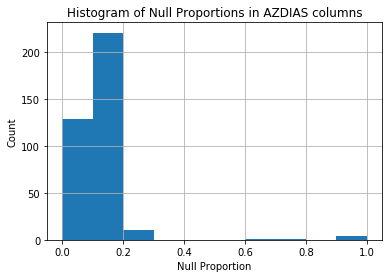

In [5]:
# checking the percentage of null values in columns
azdias_null_prop = get_null_prop(azdias)
plt.title('Histogram of Null Proportions in AZDIAS columns')
plt.xlabel('Null Proportion')
plt.ylabel('Count');

Text(0,0.5,'Null Proportion')

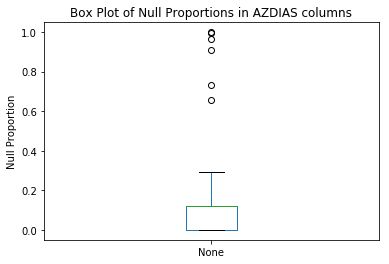

In [6]:
azdias_null_prop.plot(kind='box')
plt.title("Box Plot of Null Proportions in AZDIAS columns");
plt.ylabel("Null Proportion")';'

There are some columns that have more than half of these values missing, let's find out about them.

In [7]:
# columns with more than 50% missing values
col_half_null = azdias.columns[perc_null > 0.5]
print('Number of columns with more than half missing values:', len(col_half_null))
azdias[col_half_null].head()

NameError: name 'perc_null' is not defined

Are these columns the same in the customers dataframe? 

In [ ]:
customers[col_half_null].isnull().sum() > customers.shape[0]//2

There is only one feature than stands out in the customers dataframe from these columns.

### **But what are these columns anyway?**
1. ALTER_KIND1: share of car owners less than 31 years old
2. ALTER_KIND2: share of car owners inbetween 31 and 45 years of age
3. ALTER_KIND3: share of car owners inbetween 45 and 60 years of age
4. ALTER_KIND4: share of cars owners elder than 61 years
5. EXTSEL992: no info
6. KK_KUNDENTYP: consumption movement in the last 12 months

In [ ]:
# exploring EXTSEL992
azdias['EXTSEL992'].unique()

It seems like this mystery column has integer discrete values, but I don't know what it indicates.

### **What are the proportions of null values in the customers dataset?**

In [ ]:
cust_null_prop = get_null_prop(customers)
plt.title('Histogram of Null Values Percentages in CUSTOMER columns')
plt.xlabel("Null Proportion")
plt.ylabel("Count");

In [ ]:
cust_null_prop.plot(kind='box')
plt.title("Box Plot of Null Proportions in CUSTOMER columns");
plt.ylabel("Null Proportion")

It looks like the percentage of null values in our customers dataset columns is considerably lower than that of azdias.

However, since we are training the unsupervised learning algorithm on the customer dataser, we'll need to see what fits with azdias and do the same with customers.

### The conclusion from the previous part is that:
1. We can drop the columns with outlier null percentages since they are only 6
2. More than 75% of columns don't exceed 20% percentages of null values so they can be imputed safely

In [ ]:
# clean azdias and customers datasets from columns with more than 50% missing data
cols_to_drop = azdias.columns[azdias_null_prop > 0.5]
azdias_clean = azdias.drop(columns=cols_to_drop)
customers_clean = customers.drop(columns=cols_to_drop)

### **What is the proportion of null values in azdias rows?**

In [ ]:
# checking the percentage of null values in rows
azdias_null_prop_rows = get_null_prop(azdias, axis=1)
plt.title('Histogram of Null Proportions in AZDIAS rows');
plt.xlabel('Null Proportion')
plt.ylabel('Count');

In [ ]:
azdias_null_prop_rows.plot(kind='box')
plt.title("Box Plot of Null Proportions in AZDIAS rows");
plt.ylabel("Null Proportion")
plt.xlabel("Rows");

In [ ]:
# proportion of rows with null values higher than 10%
(azdias_null_prop_rows > 0.1).sum()/azdias.shape[0]

### From this plot we can see that:
1. There are no rows with 100% missing values
2. Around 85% of rows have less than 10% missing values

I think that I should impute rows with less than 50% missing data and drop the rest. It might seem like an arbitrary cutoff and it actually is, which might improved by tuning it to improve the final results.

### **What is the proportion of null values in customers rows?**

In [ ]:
# checking the percentage of null values in rows
cust_null_prop_rows = get_null_prop(customers, axis=1)
plt.title('Histogram of Null Proportions in CUSTOMERS rows');
plt.xlabel("Null Proportion")
plt.ylabel("Count");

In [ ]:
cust_null_prop_rows.plot(kind='box')
plt.title("Box Plot of Null Proportions in CUSTOMERS rows");
plt.ylabel("Null Proportion");

The picture is different with the customers dataset, where a large number of rows have high null proportions.

### **What is the percentage of rows that exceed 50% null values in customers dataset?**

In [ ]:
(cust_null_prop_rows > 0.5).sum() / customers.shape[0]

Around **26%** of rows in the customer data have more than **50%** missing values. I don't know what the right thing to do with these rows right now, but after I finish the customer segmentation model using the azdias dataset, I'll come back to them to figure it out.

In [ ]:
azdias.dtypes.value_counts()

In [ ]:
def clean_azdias(azdias):
    """A function to clean AZDIAS dataframe."""
    # drop columns with more than 50% missing values
    azdias_null_prop = get_null_prop(azdias)
    cols_to_drop = azdias.columns[azdias_null_prop > 0.5]
    azdias = azdias.drop(columns=cols_to_drop)
    
    # drop rows with more than 50% missing values
    azidas
    

In [ ]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')